In [1]:
import pandas as pd
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
import os
import sys

import umap

In [2]:
import tensorflow as tf

In [3]:
# Deep Learning libraries
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Reshape
from keras.layers import Dense, Input
#from keras.layers import Merge
from keras.layers import Concatenate
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from keras.utils.vis_utils import plot_model
from keras import initializers, optimizers

import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from keras.utils.vis_utils import plot_model
from keras import initializers, optimizers

import h5py

Using TensorFlow backend.


In [5]:
# Seeding libraries
from numpy.random import seed
from tensorflow import set_random_seed
import random
import seaborn as sns; sns.set()

In [6]:
sys.path

['/Users/xbasra/miniconda3/envs/AirwayClustDL/lib/python36.zip',
 '/Users/xbasra/miniconda3/envs/AirwayClustDL/lib/python3.6',
 '/Users/xbasra/miniconda3/envs/AirwayClustDL/lib/python3.6/lib-dynload',
 '',
 '/Users/xbasra/miniconda3/envs/AirwayClustDL/lib/python3.6/site-packages',
 '/Users/xbasra/miniconda3/envs/AirwayClustDL/lib/python3.6/site-packages/IPython/extensions',
 '/Users/xbasra/.ipython']

In [7]:
# adding the path to the Functions inside the project
p = os.path.abspath('/Users/xbasra/Documents/Data/Airway_Clustering/Python_Functions/')
if p not in sys.path:
    sys.path.append(p)


In [8]:
Airway_data = pd.read_csv('/Users/xbasra/Documents/Data/Airway_Clustering/Intermediate/Preprocessed_data/Airway2_f.csv')
del Airway_data['Unnamed: 0']
converted_airway = pd.read_csv('/Users/xbasra/Documents/Data/Airway_Clustering/Intermediate/Preprocessed_data/converted_airway.csv')
del converted_airway['Unnamed: 0']
pd.set_option('display.max_columns', 30)
airway_2 = pd.read_csv('/Users/xbasra/Documents/Data/Airway_Clustering/Intermediate/Preprocessed_data/Airway2.csv')
del airway_2['Unnamed: 0']
airway_2.head()

,ever_smoker20py,F107,fev1pp_olin,fvcpp_olin,exp_dust_work,BMI,Longstanding_cough,Sputum_production,Chronic_productive_cough,Recurrent_wheeze,asthmatic_wheeze,wheezeSB,dyspneaMRC,exacerbations,current_rhinitis,fam_asthma_allergy,fam_bronch_emphys,gender,post_fev1_fvc_ratio,delta_fev1,IgEorSPT,Airway_medicine_use2
0,0,78.0,81.095807,76.862186,1,28.408163,0,1,1,0,0,0,0,0,0,0,0,1,0.779503,0.020000,1,0
1,0,78.0,125.124273,130.605667,0,30.629251,1,0,0,0,0,0,1,0,0,0,0,0,0.720690,0.040000,1,0
2,0,78.0,97.549513,98.730729,0,22.100290,0,1,1,0,0,0,0,0,1,0,0,0,0.721612,0.020000,1,0
3,0,78.0,108.769369,103.974779,1,31.572071,0,0,0,0,0,0,1,0,1,1,0,1,0.781594,0.078566,1,0
4,0,77.0,94.967424,104.101256,1,26.264944,1,0,0,1,0,0,0,0,0,0,0,1,0.670807,0.080000,1,0


In [9]:
# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
os.environ['PYTHONHASHSEED']=str(0)
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
random.seed(44)
# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
seed(22)
# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)
tf.set_random_seed(454)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [15]:
dec_airway = DEC(dims=[converted_airway.shape[-1], 200, 10], n_clusters=6)
#plot_model(dec_food.model, to_file='dec_model.png', show_shapes=True)
dec_airway.model.summary()
t0 = time()

# Pretrain autoencoders before clustering
dec_airway.pretrain(converted_airway, batch_size=128, epochs=100, optimizer='adam')
# begin clustering, time not include pretraining part.

dec_airway.compile(loss='kld', optimizer='adam')
dec_airway.fit(converted_airway, y=None, batch_size=128, tol= 0.00001, maxiter=15000,
            update_interval=40)

# Show the final results
y_pred = dec_airway.y_pred
#print('acc:', cluster_acc(y, y_pred))
print('clustering time: %d seconds.' % int(time() - t0))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 22)                0         
_________________________________________________________________
encoder_0 (Dense)            (None, 200)               4600      
_________________________________________________________________
encoder_1 (Dense)            (None, 10)                2010      
_________________________________________________________________
clustering (ClusteringLayer) (None, 6)                 60        
Total params: 6,670
Trainable params: 6,670
Non-trainable params: 0
_________________________________________________________________
...Pretraining...
Epoch 1/100
1257/1257 [==============================] - 0s 142us/step - loss: 1.2088
Epoch 2/100
1257/1257 [==============================] - 0s 13us/step - loss: 1.0234
Epoch 3/100
1257/1257 [==============================] - 0s 15us/step - loss: 0.819

1257/1257 [==============================] - 0s 15us/step - loss: 0.2916
Epoch 87/100
1257/1257 [==============================] - 0s 15us/step - loss: 0.2922
Epoch 88/100
1257/1257 [==============================] - 0s 15us/step - loss: 0.2919
Epoch 89/100
1257/1257 [==============================] - 0s 15us/step - loss: 0.2914
Epoch 90/100
1257/1257 [==============================] - 0s 14us/step - loss: 0.2901
Epoch 91/100
1257/1257 [==============================] - 0s 14us/step - loss: 0.2884
Epoch 92/100
1257/1257 [==============================] - 0s 14us/step - loss: 0.2881
Epoch 93/100
1257/1257 [==============================] - 0s 14us/step - loss: 0.2877
Epoch 94/100
1257/1257 [==============================] - 0s 15us/step - loss: 0.2880
Epoch 95/100
1257/1257 [==============================] - 0s 16us/step - loss: 0.2870
Epoch 96/100
1257/1257 [==============================] - 0s 15us/step - loss: 0.2859
Epoch 97/100
1257/1257 [==============================] - 0s 15us/s

In [16]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([246, 329, 219,  64, 188, 211]))

In [11]:
from DEC import DEC
from FcDEC import FcDEC
from FcIDEC import FcIDEC
from ConvDEC import ConvDEC
from ConvIDEC import ConvIDEC

In [12]:
#FcDE_airway = FcDEC(dims=[np.asarray(converted_airway).shape[-1], 500, 500, 2000, 10], n_clusters=6)
#FcDE_airway = FcDEC(dims=[np.asarray(converted_airway).shape[-1], 500, 200, 14], n_clusters=6)
FcDE_airway = FcDEC(dims=[np.asarray(converted_airway).shape[-1], 100, 70, 15], n_clusters=5)
FcDE_airway.pretrain(converted_airway.values, batch_size=128, epochs=200, optimizer='adam', aug_pretrain=False)

Begin pretraining:  ------------------------------------------------------------
Epoch 1/200
1257/1257 [==============================] - 0s 156us/step - loss: 1.2673
Epoch 2/200
1257/1257 [==============================] - 0s 17us/step - loss: 1.1998
Epoch 3/200
1257/1257 [==============================] - 0s 18us/step - loss: 1.0500
Epoch 4/200
1257/1257 [==============================] - 0s 18us/step - loss: 0.9580
Epoch 5/200
1257/1257 [==============================] - 0s 19us/step - loss: 0.8801
Epoch 6/200
1257/1257 [==============================] - 0s 18us/step - loss: 0.8032
Epoch 7/200
1257/1257 [==============================] - 0s 19us/step - loss: 0.7392
Epoch 8/200
1257/1257 [==============================] - 0s 19us/step - loss: 0.7013
Epoch 9/200
1257/1257 [==============================] - 0s 20us/step - loss: 0.6682
Epoch 10/200
1257/1257 [==============================] - 0s 20us/step - loss: 0.6392
Epoch 11/200
1257/1257 [==============================] - 0s 19us/s

1257/1257 [==============================] - 0s 17us/step - loss: 0.1727
Epoch 96/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1717
Epoch 97/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1713
Epoch 98/200
1257/1257 [==============================] - 0s 18us/step - loss: 0.1715
Epoch 99/200
1257/1257 [==============================] - 0s 18us/step - loss: 0.1706
Epoch 100/200
1257/1257 [==============================] - 0s 18us/step - loss: 0.1707
Epoch 101/200
1257/1257 [==============================] - 0s 18us/step - loss: 0.1711
Epoch 102/200
1257/1257 [==============================] - 0s 18us/step - loss: 0.1703
Epoch 103/200
1257/1257 [==============================] - 0s 18us/step - loss: 0.1681
Epoch 104/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1681
Epoch 105/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1690
Epoch 106/200
1257/1257 [==============================] - 0s

1257/1257 [==============================] - 0s 17us/step - loss: 0.1439
Epoch 190/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1439
Epoch 191/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1450
Epoch 192/200
1257/1257 [==============================] - 0s 18us/step - loss: 0.1449
Epoch 193/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1437
Epoch 194/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1439
Epoch 195/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1440
Epoch 196/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1438
Epoch 197/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1431
Epoch 198/200
1257/1257 [==============================] - 0s 17us/step - loss: 0.1434
Epoch 199/200
1257/1257 [==============================] - 0s 16us/step - loss: 0.1431
Epoch 200/200
1257/1257 [==============================] 

In [13]:
optimizer = SGD(lr= 0.9)
#FcDE_airway = FcDEC(dims=[np.asarray(converted_airway).shape[-1], 500, 500, 2000, 10], n_clusters=6)
FcDE_airway.compile(optimizer=optimizer, loss='kld')
y_pred_FcDE = FcDE_airway.fit(converted_airway.values, y=None, maxiter=15000, batch_size=128, update_interval=40,aug_cluster=False)

Begin clustering: ------------------------------------------------------------
Update interval 40
Save interval 15000
Initializing cluster centers with k-means.
saving model to: ./results/temp/model_0.h5
delta_label  0.0 < tol  0.001
Reached tolerance threshold. Stopping training.
saving model to: ./results/temp/model_final.h5
Clustering time: 3s
End clustering: ------------------------------------------------------------


In [14]:
np.unique(y_pred_FcDE, return_counts=True)

(array([3]), array([1257]))

In [12]:
np.unique(y_pred_FcDE, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([431, 169, 273,  92, 153, 139]))

In [220]:
result_airway_uft_DEC = converted_airway.copy()
result_airway_uft_DEC['cluster'] = y_umap_k
result_airway_uft_DEC = result_airway_uft_DEC.to_csv('/Users/xbasra/Documents/Data/Airway_Clustering/Intermediate/CSV_output_data/result_airway_uft_DEC.csv', index = None, header=True)

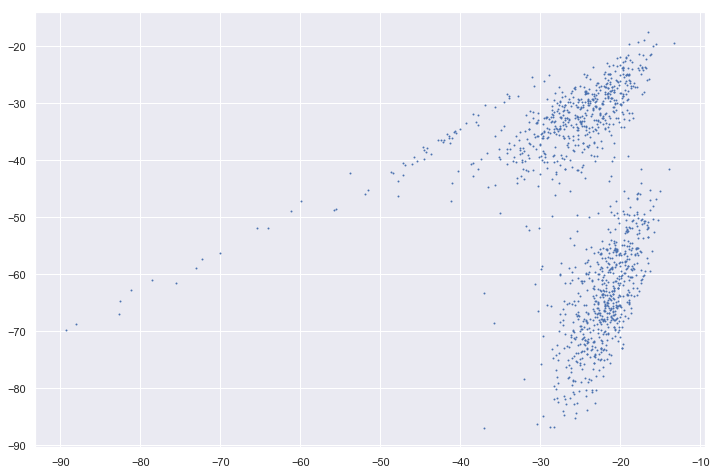

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(FcDE_airway.encoder.predict(converted_airway)[:, 0], FcDE_airway.encoder.predict(converted_airway)[:, 1],
s=0.9, cmap='Spectral');

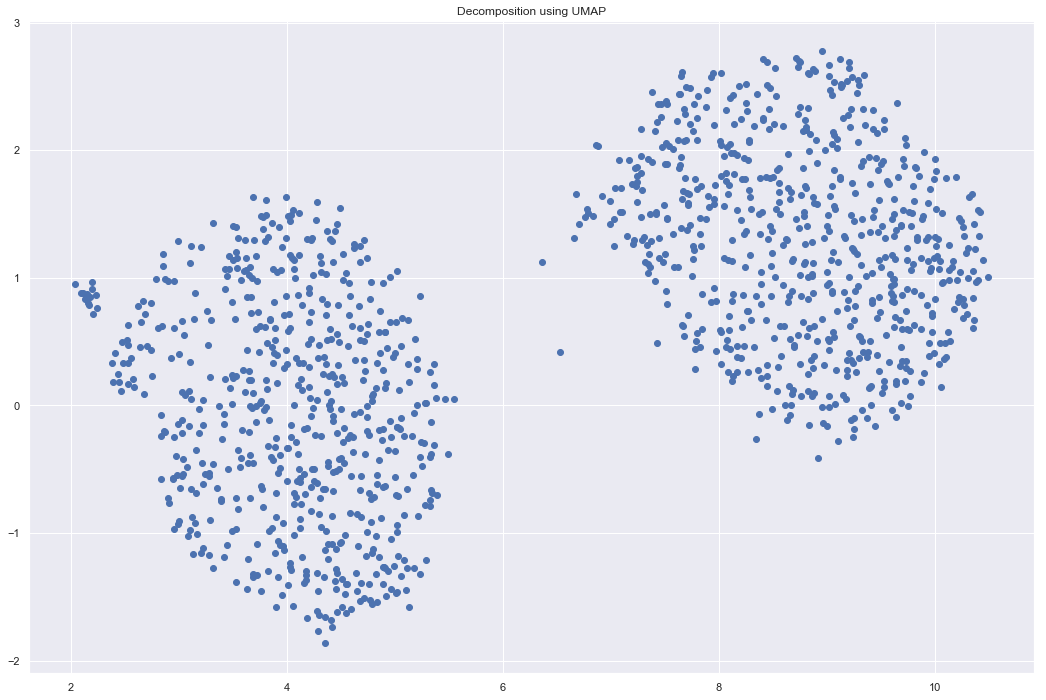

In [209]:
#import umap
#import matplotlib.cm as cm
embedding_airway = umap.UMAP(
    n_neighbors=100,
    min_dist=0.1,
    n_components=2,random_state=15
).fit_transform(converted_airway)
plt.figure(figsize=(18,12))
plt.title('Decomposition using UMAP')
plt.scatter(embedding_airway[:,0], embedding_airway[:,1], cmap='Spectral')
embedding_airway = embedding_airway.astype(np.float64)
#5,16

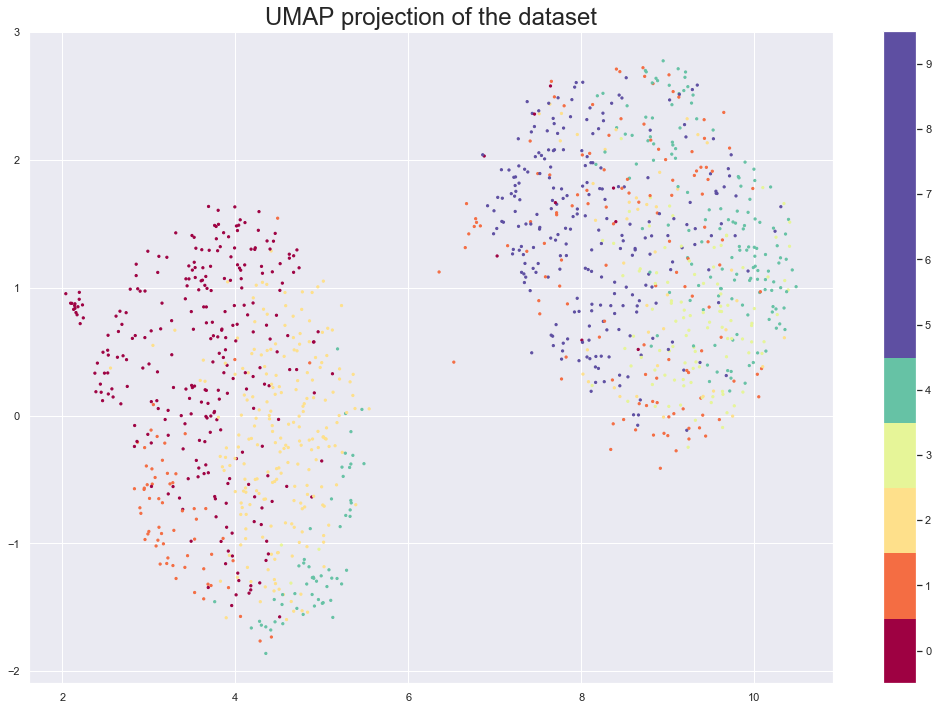

In [128]:
plt.figure(figsize=(18,12))
plt.scatter(embedding_airway[:, 0], embedding_airway[:, 1], c=y_pred_FcDE, cmap='Spectral', s=5)
#plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the dataset', fontsize=24);

In [56]:
y_pred_FcDE

array([1, 5, 4, ..., 2, 5, 1])

In [68]:
kmeans = KMeans(n_clusters=6, n_init=50, random_state=11)
y_kmeans_pres = kmeans.fit_predict(converted_airway)
adjusted_rand_score(y_kmeans_pres, y_pred_FcDE)

0.16568841800602213

# N2D method

In [ ]:
# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
os.environ['PYTHONHASHSEED']=str(0)
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
random.seed(5)
# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
seed(13)
# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)
set_random_seed(454)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)



In [20]:
def autoencoder(dims, act='relu', init=initializers.glorot_uniform(seed=1)):
    """
    Fully connected auto-encoder model, symmetric.
    Arguments:
        dims: list of number of units in each layer of encoder. dims[0] is input dim, dims[-1] is units in hidden layer.
            The decoder is symmetric with encoder. So number of layers of the auto-encoder is 2*len(dims)-1
        act: activation, not applied to Input, Hidden and Output layers
    return:
        (ae_model, encoder_model), Model of autoencoder and model of encoder
    """
    n_stacks = len(dims) - 1
    # input
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    # internal layers in encoder
    for i in range(n_stacks-1):
        my_init = initializers.glorot_uniform(seed=1)
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # hidden layer
    my_init = initializers.glorot_uniform(seed=1)
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  # hidden layer, features are extracted from here

    x = encoded
    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        my_init = initializers.glorot_uniform(seed=1)
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')


dims = [converted_airway.shape[-1], 300, 15]
#dims = [converted_airway.shape[-1], 500, 15]
#dims = [converted_airway.shape[-1], 500, 17]
#dims = [converted_airway.shape[-1],200, 500, 15]
init = VarianceScaling(scale=1. / 3., mode='fan_in', distribution='uniform', seed=2)
#pretrain_optimizer = SGD(lr=1, momentum=0.9)
pretrain_optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
pretrain_epochs = 300
batch_size = 256

autoencoder, encoder = autoencoder(dims)
autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(converted_airway, converted_airway, batch_size=batch_size, epochs=pretrain_epochs, validation_split=0.1) #, callbacks=cb)



aue_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    n_components=2,random_state=15
).fit_transform(encoder.predict(converted_airway))
aue_embedding_num = aue_embedding.astype(np.float64)



kmeans = KMeans(n_clusters=6, n_init=50, random_state=11)
y_umap_k = kmeans.fit_predict(aue_embedding)
#y_converted_k = kmeans.fit_predict(converted_airway)

Train on 1131 samples, validate on 126 samples
Epoch 1/300
1131/1131 [==============================] - 0s 278us/step - loss: 1.2562 - val_loss: 1.0431
Epoch 2/300
1131/1131 [==============================] - 0s 15us/step - loss: 1.1229 - val_loss: 0.9119
Epoch 3/300
1131/1131 [==============================] - 0s 14us/step - loss: 0.9698 - val_loss: 0.7878
Epoch 4/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.8280 - val_loss: 0.7064
Epoch 5/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.7254 - val_loss: 0.6411
Epoch 6/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.6425 - val_loss: 0.5755
Epoch 7/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.5712 - val_loss: 0.5130
Epoch 8/300
1131/1131 [==============================] - 0s 14us/step - loss: 0.5092 - val_loss: 0.4604
Epoch 9/300
1131/1131 [==============================] - 0s 14us/step - loss: 0.4593 - val_loss: 0.4201
Epoch 10/300
113

1131/1131 [==============================] - 0s 15us/step - loss: 0.1395 - val_loss: 0.2117
Epoch 79/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.1388 - val_loss: 0.2151
Epoch 80/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.1376 - val_loss: 0.2139
Epoch 81/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.1371 - val_loss: 0.2133
Epoch 82/300
1131/1131 [==============================] - 0s 14us/step - loss: 0.1362 - val_loss: 0.2142
Epoch 83/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.1350 - val_loss: 0.2156
Epoch 84/300
1131/1131 [==============================] - 0s 14us/step - loss: 0.1341 - val_loss: 0.2137
Epoch 85/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.1336 - val_loss: 0.2154
Epoch 86/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.1330 - val_loss: 0.2143
Epoch 87/300
1131/1131 [==============================] - 0s 15us/st

1131/1131 [==============================] - 0s 16us/step - loss: 0.0927 - val_loss: 0.2325
Epoch 156/300
1131/1131 [==============================] - 0s 16us/step - loss: 0.0926 - val_loss: 0.2341
Epoch 157/300
1131/1131 [==============================] - 0s 16us/step - loss: 0.0922 - val_loss: 0.2333
Epoch 158/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0915 - val_loss: 0.2337
Epoch 159/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0913 - val_loss: 0.2407
Epoch 160/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0913 - val_loss: 0.2315
Epoch 161/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0913 - val_loss: 0.2409
Epoch 162/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0913 - val_loss: 0.2367
Epoch 163/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0902 - val_loss: 0.2345
Epoch 164/300
1131/1131 [==============================] - 0

1131/1131 [==============================] - 0s 15us/step - loss: 0.0686 - val_loss: 0.2568
Epoch 233/300
1131/1131 [==============================] - 0s 14us/step - loss: 0.0679 - val_loss: 0.2607
Epoch 234/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0672 - val_loss: 0.2608
Epoch 235/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0673 - val_loss: 0.2582
Epoch 236/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0675 - val_loss: 0.2645
Epoch 237/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0685 - val_loss: 0.2620
Epoch 238/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0680 - val_loss: 0.2577
Epoch 239/300
1131/1131 [==============================] - 0s 16us/step - loss: 0.0669 - val_loss: 0.2637
Epoch 240/300
1131/1131 [==============================] - 0s 15us/step - loss: 0.0662 - val_loss: 0.2625
Epoch 241/300
1131/1131 [==============================] - 0

In [21]:
adjusted_rand_score(y_pred, y_umap_k)

0.36226100931589583

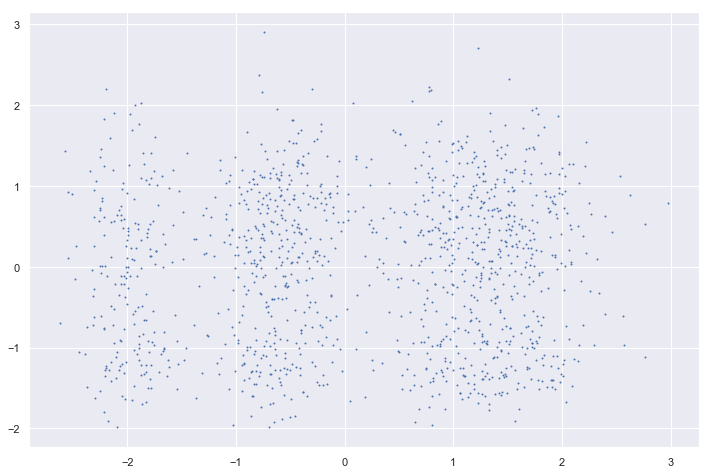

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(autoencoder.predict(converted_airway)[:, 0], autoencoder.predict(converted_airway)[:, 1],
s=0.9, cmap='Spectral');

In [107]:
converted_airway.shape

(1257, 22)

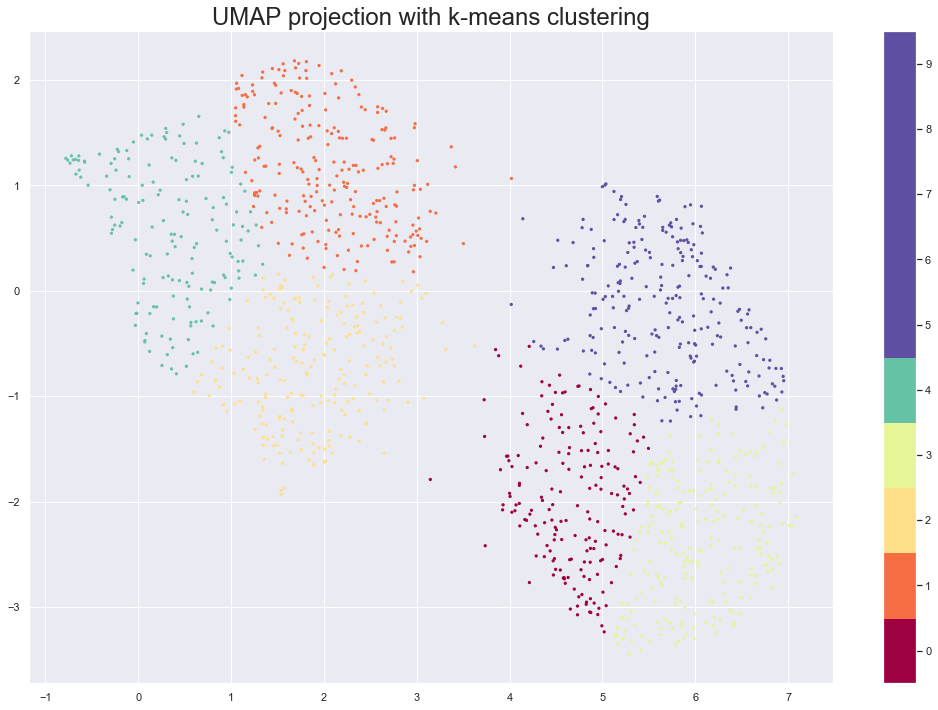

In [23]:
plt.figure(figsize=(18,12))
plt.scatter(aue_embedding[:, 0], aue_embedding[:, 1], c=y_umap_k, cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection with k-means clustering', fontsize=24);

In [262]:
result_airway_uft_n2d = converted_airway.copy()
result_airway_uft_n2d['cluster'] = y_umap_k
result_airway_uft_n2d = result_airway_uft_n2d.to_csv('/Users/xbasra/Documents/Data/Airway_Clustering/Intermediate/CSV_output_data/result_airway_uft_n2d.csv', index = None, header=True)

In [42]:
FcIDE_airway = FcIDEC(dims=[np.asarray(converted_airway).shape[-1], 500, 2000, 10], n_clusters=6)
FcIDE_airway.pretrain(converted_airway.values, y=None, batch_size=128, epochs=300, optimizer='adam', aug_pretrain=False)

Begin pretraining:  ------------------------------------------------------------
Epoch 1/300
1257/1257 [==============================] - 1s 626us/step - loss: 0.9742
Epoch 2/300
1257/1257 [==============================] - 0s 231us/step - loss: 0.6074
Epoch 3/300
1257/1257 [==============================] - 0s 232us/step - loss: 0.4670
Epoch 4/300
1257/1257 [==============================] - 0s 229us/step - loss: 0.4153
Epoch 5/300
1257/1257 [==============================] - 0s 229us/step - loss: 0.3878
Epoch 6/300
1257/1257 [==============================] - 0s 232us/step - loss: 0.3675
Epoch 7/300
1257/1257 [==============================] - 0s 228us/step - loss: 0.3531
Epoch 8/300
1257/1257 [==============================] - 0s 226us/step - loss: 0.3411
Epoch 9/300
1257/1257 [==============================] - 0s 229us/step - loss: 0.3284
Epoch 10/300
1257/1257 [==============================] - 0s 228us/step - loss: 0.3177
Epoch 11/300
1257/1257 [==============================] - 

1257/1257 [==============================] - 0s 236us/step - loss: 0.0141
Epoch 188/300
1257/1257 [==============================] - 0s 235us/step - loss: 0.0146
Epoch 189/300
1257/1257 [==============================] - 0s 240us/step - loss: 0.0146
Epoch 190/300
1257/1257 [==============================] - 0s 242us/step - loss: 0.0166
Epoch 191/300
1257/1257 [==============================] - 0s 237us/step - loss: 0.0194
Epoch 192/300
1257/1257 [==============================] - 0s 275us/step - loss: 0.0174
Epoch 193/300
1257/1257 [==============================] - 0s 245us/step - loss: 0.0188
Epoch 194/300
1257/1257 [==============================] - 0s 238us/step - loss: 0.0170
Epoch 195/300
1257/1257 [==============================] - 0s 248us/step - loss: 0.0183
Epoch 196/300
1257/1257 [==============================] - 0s 233us/step - loss: 0.0170
Epoch 197/300
1257/1257 [==============================] - 0s 237us/step - loss: 0.0146
Epoch 198/300
1257/1257 [=====================

In [43]:
#optimizer = 'adam'
optimizer = SGD(lr= 0.9)
FcIDE_airway = FcIDEC(dims=[np.asarray(converted_airway).shape[-1], 500, 500, 2000, 10], n_clusters=6)
FcIDE_airway.compile(optimizer=optimizer, loss='kld')
y_pred_FcIDE = FcIDE_airway.fit(converted_airway.values, y=None, maxiter=15000, batch_size=128, update_interval=100,aug_cluster=False)

Begin clustering: ------------------------------------------------------------
Update interval 100
Save interval 15000
Initializing cluster centers with k-means.
saving model to: ./results/temp/model_0.h5
delta_label  0.0 < tol  0.001
Reached tolerance threshold. Stopping training.
saving model to: ./results/temp/model_final.h5
Clustering time: 6s
End clustering: ------------------------------------------------------------


In [44]:
np.unique(y_pred_FcIDE, return_counts=True)

(array([0, 1, 2, 4]), array([484, 755,  14,   4]))

In [38]:
adjusted_rand_score(y_pred_FcIDE, y_pred_FcDE), adjusted_rand_score(y_kmeans_pres, y_pred_FcIDE)

(0.0, 0.0)

In [34]:
adjusted_rand_score(y_pred_FcIDE, y_pred_FcDE)

0.0

In [17]:
x = converted_airway.values.reshape([converted_airway.values.shape[0],-1])
CovnDE_airway =ConvDEC(input_shape=x.shape[1:], filters=[32, 64, 128, 10], n_clusters=6)
CovnDE_airway.pretrain(converted_airway.values, y=None, batch_size=128, epochs=100, optimizer='adam', aug_pretrain=False)

ValueError: Input 0 is incompatible with layer conv1: expected ndim=4, found ndim=2

In [28]:
x.shape[1:]

(22,)